<a href="https://colab.research.google.com/github/WoradeeKongthong/DataCamp2020_homework/blob/master/ProjectVII_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : จงหา dataset ของหุ้น และใช้ RNN ทำการทำนายราคาหุ้น และ plot graph การทำนายออกมาให้เห็น

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

## Dataset
Note : ใช้วิธีการดึงราคาหุ้น GOOGLE จาก finance.yahoo.com ด้วย pandas_datareader

In [20]:
GOOG = pdr.get_data_yahoo('GOOG', start='2018-01-01', end='2019-12-31')

In [3]:
GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941
...,...,...,...,...,...,...
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059,347500,1343.560059
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024,667500,1360.400024
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038400,1351.890015


## Explore data

In [4]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2018-01-02 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       503 non-null    float64
 1   Low        503 non-null    float64
 2   Open       503 non-null    float64
 3   Close      503 non-null    float64
 4   Volume     503 non-null    int64  
 5   Adj Close  503 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


Note : no missing values

In [5]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02,503.000000
mean,1161.353189,1139.839756,1150.354979,1150.883815,1.577699e+06,1150.883815
std,81.322605,85.525999,83.239081,83.754500,6.903432e+05,83.754500
min,1003.539978,970.109985,973.900024,976.219971,3.475000e+05,976.219971
25%,1094.852478,1073.484985,1083.820007,1085.169983,1.171400e+06,1085.169983
50%,1153.420044,1133.329956,1144.449951,1146.209961,1.408900e+06,1146.209961
75%,1211.639954,1196.302551,1202.720032,1205.015015,1.809300e+06,1205.015015
max,1365.000000,1352.670044,1363.349976,1361.170044,6.207000e+06,1361.170044


In [6]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941


In [7]:
GOOG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059,347500,1343.560059
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024,667500,1360.400024
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038400,1351.890015
2019-12-30,1353.000000,1334.020020,1350.000000,1336.140015,1050900,1336.140015
2019-12-31,1338.000000,1329.084961,1330.109985,1337.020020,961800,1337.020020


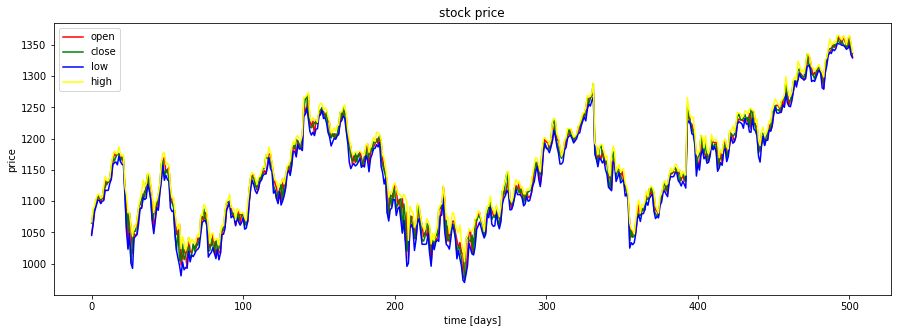

In [9]:
# plot the stock price
plt.figure(figsize=(15,5))
plt.plot(GOOG.Open.values, color='red', label='open')
plt.plot(GOOG.Close.values, color='green', label='close')
plt.plot(GOOG.Low.values, color='blue', label='low')
plt.plot(GOOG.High.values, color='yellow', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

## Data Preprocessing

In [21]:
# Drop Volumn and Adj close columns
GOOG.drop(['Volume', 'Adj Close'], axis=1, inplace=True)
GOOG

,High,Low,Open,Close
Date,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941
...,...,...,...,...
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015


In [36]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

sc_high = MinMaxScaler(feature_range = (0,1))
sc_low = MinMaxScaler(feature_range = (0,1))
sc_open = MinMaxScaler(feature_range = (0,1))
sc_close = MinMaxScaler(feature_range = (0,1))

GOOG_norm = pd.DataFrame()
GOOG_norm['High'] = sc_high.fit_transform(GOOG.High.values.reshape(-1,1)).reshape(-1)
GOOG_norm['Low'] = sc_low.fit_transform(GOOG.Low.values.reshape(-1,1)).reshape(-1)
GOOG_norm['Open'] = sc_open.fit_transform(GOOG.Open.values.reshape(-1,1)).reshape(-1)
GOOG_norm['Close'] = sc_close.fit_transform(GOOG.Close.values.reshape(-1,1)).reshape(-1)

In [37]:
GOOG_norm

,High,Low,Open,Close
0,0.175400,0.196361,0.191141,0.230627
1,0.228933,0.243360,0.232148,0.276036
2,0.249073,0.297710,0.292977,0.286219
3,0.278620,0.318617,0.308384,0.327341
4,0.298041,0.343763,0.329516,0.339576
...,...,...,...,...
498,0.959221,0.974148,0.961869,0.954254
499,0.989839,0.978565,0.955887,0.998000
500,0.998700,0.991217,0.999076,0.975893
501,0.966801,0.951249,0.965721,0.934979


In [38]:
GOOG_norm.describe()

,High,Low,Open,Close
count,503.000000,503.000000,503.000000,503.000000
mean,0.436599,0.443668,0.453088,0.453731
std,0.224984,0.223562,0.213735,0.217572
min,0.000000,0.000000,0.000000,0.000000
25%,0.252621,0.270219,0.282244,0.283024
50%,0.414652,0.426652,0.437925,0.441590
75%,0.575721,0.591260,0.587547,0.594350
max,1.000000,1.000000,1.000000,1.000000


In [40]:
# function to create timestep sequence
# X = n steps sequence of data (High, Low, Open, Close)
# y = 1 step of Close price

def create_sequence(df, n_steps_in, n_steps_out):
  data = df.values # convert to numpy array
  X = []
  y = []
  for i in range(n_steps_in, len(data)-n_steps_out+1):
    X.append(data[i - n_steps_in:i])
    y.append(data[i : i + n_steps_out, -1])
  return np.array(X), np.array(y)

In [41]:
# choose number of timesteps
n_steps_in = 10
n_steps_out = 1
# Create the sequence and the output
X, y = create_sequence(GOOG_norm, n_steps_in, n_steps_out)

n_features = X.shape[2]
print('X shape : ',X.shape)
print('y shape : ',y.shape)

X shape :  (493, 10, 4)
y shape :  (493, 1)


In [42]:
# print example
print(X[0], '==>', y[0])

[[0.17539966 0.19636131 0.19114123 0.23062739]
 [0.22893282 0.24336042 0.23214802 0.27603582]
 [0.2490731  0.29771003 0.29297725 0.28621907]
 [0.27862008 0.31861668 0.30838359 0.32734118]
 [0.29804137 0.34376304 0.32951591 0.33957643]
 [0.29610458 0.34274611 0.34792661 0.33781014]
 [0.27958831 0.32936005 0.31634348 0.32832833]
 [0.28491407 0.33845661 0.33996672 0.33588784]
 [0.33406201 0.34253455 0.32997824 0.37937397]
 [0.37727563 0.3861408  0.40726667 0.3780751 ]] ==> [0.40462393]


In [43]:
# Train-test split
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [45]:
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (394, 10, 4)
y_train shape :  (394, 1)
X_test shape :  (99, 10, 4)
y_test shape :  (99, 1)


## The LSTM model

In [46]:
# create LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [47]:
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=n_steps_out))

In [48]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            17664     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 50,753
Trainable params: 50,753
Non-trainable params: 0
_________________________________________________________________


In [49]:
# compile the model
model.compile(optimizer='adam', loss='mse')

In [50]:
# fit the model
history = model.fit(X_train, y_train, epochs = 200, verbose = 1, validation_split=0.2, shuffle=False)

Epoch 1/200
10/10 [==============================] - 0s 30ms/step - loss: 0.1226 - val_loss: 0.0857
Epoch 2/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0238 - val_loss: 0.0280
Epoch 3/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0182 - val_loss: 0.0129
Epoch 4/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0135 - val_loss: 0.0116
Epoch 5/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0089 - val_loss: 0.0108
Epoch 6/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0095 - val_loss: 0.0098
Epoch 7/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0083 - val_loss: 0.0097
Epoch 8/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0084 - val_loss: 0.0094
Epoch 9/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0079 - val_loss: 0.0094
Epoch 10/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0080 - val_loss: 0.0092
Epoch 1

## Learning Curve

In [51]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

training loss :  0.12260092049837112


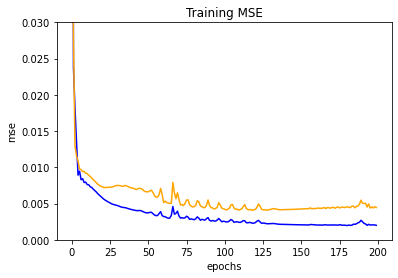

In [52]:
score = history.history['loss'][0]
print('training loss : ', score)

plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.title('Training MSE')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.ylim(0,0.03)
plt.show()

## Save the model

In [53]:
model.save('GOOG_LSTM.h5')

## model evaluation

In [54]:
# load the model
from keras.models import load_model
model = load_model('GOOG_LSTM.h5')

In [55]:
# evaluation
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0019


0.0019134895410388708

## make prediction on test set

In [56]:
# make prediction
y_pred = model.predict(X_test)

# print 10 examples of prediction
y_pred[:10]

array([[0.5417015 ],
       [0.5156896 ],
       [0.5973738 ],
       [0.45887366],
       [0.5223182 ],
       [0.5446675 ],
       [0.6115503 ],
       [0.5327482 ],
       [0.5891935 ],
       [0.5574095 ]], dtype=float32)

In [57]:
# rescale y_test and y_pred
close_price = sc_close.inverse_transform(y_test)
close_prediction = sc_close.inverse_transform(y_pred)

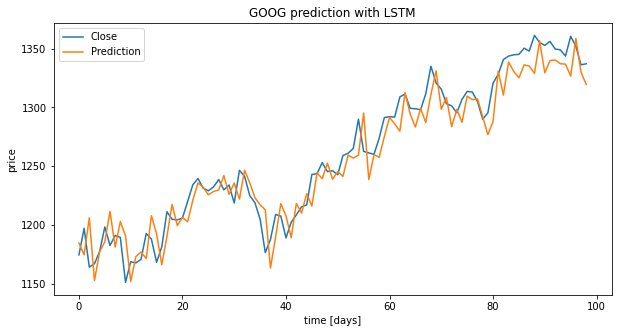

In [58]:
# plot the result
plt.figure(figsize=(10,5))
plt.plot(close_price, label='Close')
plt.plot(close_prediction, label='Prediction')
plt.legend(loc='best')
plt.title('GOOG prediction with LSTM')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.show()